In [5]:
#!pip install imbalanced-learn
#!pip install xgboost
!pip install pandas-profiling


     -------------------------------------- 324.4/324.4 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 352.9/352.9 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 153.3/153.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 1.5 MB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 540.6 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=581d4d58de3dfea4da6f00e581f8d5a61c156eeee97bd434f525a65138dff345
  Stored in directory: c:\users\degbey kayeon\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6df

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\Degbey Kayeon\AppData\Local\Temp\ipykernel_19356\3404434781.py:18: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
dtype_options = {'colonne0': float}
data = pd.read_csv("C:/Users/Degbey Kayeon/Downloads/creditcardData/creditcard.csv", sep=';', dtype=dtype_options)
data1 = data.head(50000)
data1

C:\Users\Degbey Kayeon\AppData\Local\Temp\ipykernel_19356\505079816.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/Degbey Kayeon/Downloads/creditcardData/creditcard.csv", sep=';', dtype=dtype_options)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44296,-1.007648,0.722149,0.779027,-1.466661,0.298457,-0.263997,0.442429,0.400734,-0.591588,...,0.137489,0.171923,-0.205126,-0.650297,0.072522,1.391071,-0.167746,-0.019007,39.99,0
49996,44297,-5.202399,2.077079,-3.905209,1.097967,-1.719915,-0.803272,-1.162430,2.679623,-0.640010,...,-0.071897,0.396541,0.298550,-0.451037,-0.076617,-0.317780,0.508982,-0.144442,99.99,0
49997,44298,-1.597980,-0.363988,2.114888,-1.101263,-0.291577,0.009897,0.456899,0.029229,0.712018,...,-0.161615,0.008125,-0.142336,0.078871,-0.016251,0.836074,0.302804,-0.022386,172.14,0
49998,44298,-2.998734,2.323844,-2.419829,0.941745,-1.436231,-0.847601,-0.582896,1.965394,-0.846173,...,0.201051,0.456424,-0.059220,0.040043,-0.435842,-0.391904,0.375636,-0.024394,89.99,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  object 
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [4]:
data1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.242344,0.010316,0.692829,0.185482,-0.258043,0.105202,-0.120580,0.053704,0.120198,-0.055252,...,-0.028909,-0.106878,-0.039899,0.008362,0.135912,0.020885,0.004915,0.004232,93.266587,0.002960
std,1.887731,1.629766,1.508700,1.400009,1.412611,1.311299,1.282493,1.223824,1.213120,1.144151,...,0.736011,0.637858,0.589736,0.594216,0.439013,0.501260,0.388101,0.334785,253.010040,0.054326
min,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,-0.992599,-0.564348,0.216729,-0.721295,-0.867721,-0.635255,-0.606146,-0.146744,-0.614300,-0.531234,...,-0.231454,-0.529526,-0.178930,-0.321902,-0.127945,-0.330577,-0.063231,-0.006699,7.627500,0.000000
50%,-0.245008,0.078253,0.795902,0.191131,-0.289438,-0.150443,-0.077294,0.058736,0.010464,-0.111686,...,-0.068160,-0.082056,-0.051642,0.062302,0.175743,-0.071973,0.009035,0.022174,25.000000,0.000000
75%,1.155544,0.731591,1.430980,1.067868,0.283011,0.495431,0.423920,0.332187,0.815765,0.414875,...,0.108087,0.307440,0.078620,0.401568,0.422121,0.300405,0.083875,0.076303,85.250000,0.000000
max,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [5]:
print("Division des données:")
print(f"Non frauduleuse : {round(data1['Class'].value_counts()[0]/len(data1) * 100,2)}%.")
print(f"Frauduleuse: {round(data1['Class'].value_counts()[1]/len(data1) * 100,2)}%.")

Division des données:
Non frauduleuse : 99.7%.
Frauduleuse: 0.3%.


C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


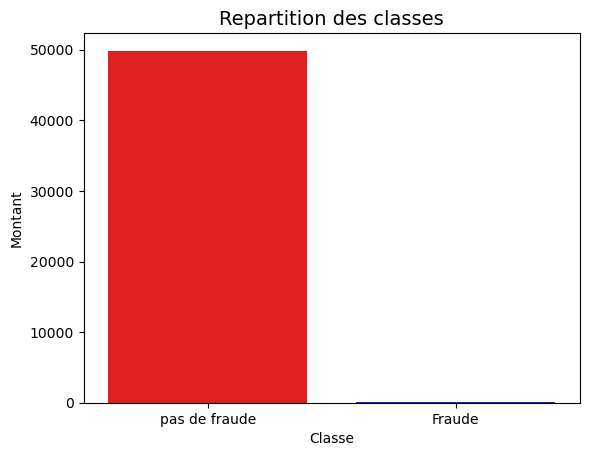

In [6]:
labels = ['pas de fraude', 'Fraude']
sns.countplot('Class', data = data1, palette = ['red','blue'])
plt.title('Repartition des classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Montant");

Verification de la difference de valeur des transaction frauduleuses et non frauduleuse.

In [7]:
fraude = data1[data1['Class'] == 1]['Amount']
n_fraude= data1[data1['Class'] == 0]['Amount']

In [8]:
print(f"Fraude:\n{fraude.describe()}\n")
print(f"Pas de Fraude:\n{n_fraude.describe()}")

Fraude:
count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

Pas de Fraude:
count    49852.000000
mean        93.246090
std        253.068018
min          0.000000
25%          7.680000
50%         25.000000
75%         85.072500
max      12910.930000
Name: Amount, dtype: float64


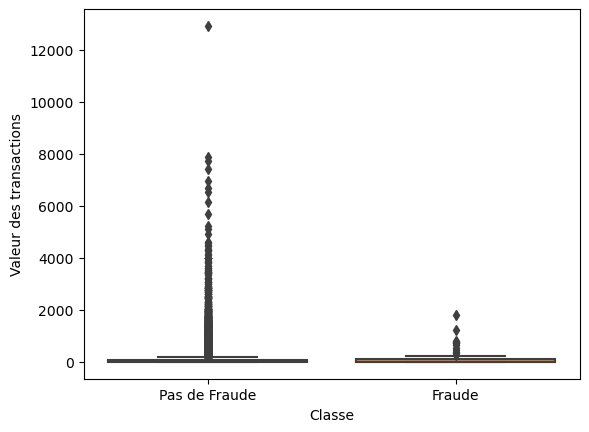

In [9]:
labels = ['Pas de Fraude', 'Fraude']
sns.boxplot(x = data1['Class'], y = data1['Amount'])
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Valeur des transactions");

On constate que les transactions non frauduleuses ont une gamme de valeurs beaucoup plus large.


Repartition des transactions

In [10]:
# Créer une copie du DataFrame pour éviter de modifier les données d'origine
data_cleaned = data1.copy()

# Parcourir les colonnes et les valeurs
for colonne in data_cleaned.columns:
    for index, valeur in enumerate(data_cleaned[colonne]):
        # Vérifier si la valeur n'est pas numérique
        if pd.notna(valeur) and not isinstance(valeur, (int, float)):
            # Supprimer la ligne contenant la valeur non numérique
            data_cleaned = data_cleaned.drop(index)

# Réinitialiser les index après la suppression des lignes
data_cleaned = data_cleaned.reset_index(drop=True)

# Afficher le DataFrame nettoyé
print(data_cleaned)

        Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
49995  44296 -1.007648  0.722149  0.779027 -1.466661  0.298457 -0.263997   
49996  44297 -5.202399  2.077079 -3.905209  1.097967 -1.719915 -0.803272   
49997  44298 -1.597980 -0.363988  2.114888 -1.101263 -0.291577  0.009897   
49998  44298 -2.998734  2.323844 -2.419829  0.941745 -1.436231 -0.847601   
49999  44299  0.618650 -1.744738  0.367658 -1.486308 -1.724517 -0.818788   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.2395

C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


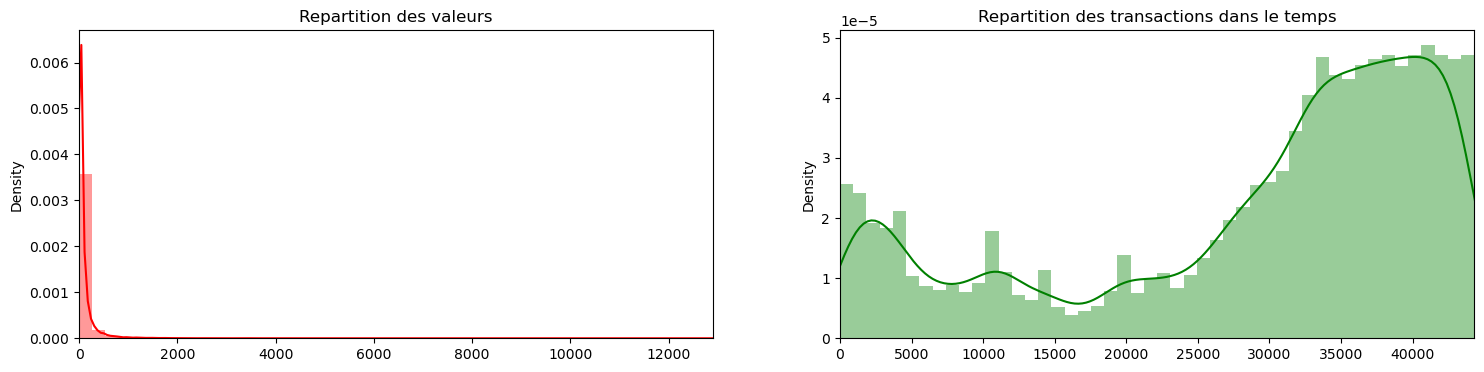

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))

valeur = data_cleaned['Amount'].values
temps = data_cleaned['Time'].values

sns.distplot(valeur, ax = ax[0], color = 'red')
ax[0].set_title('Repartition des valeurs', fontsize = 12)
ax[0].set_xlim([min(valeur), max(valeur)])

sns.distplot(temps, ax = ax[1], color = 'green')
ax[1].set_title('Repartition des transactions dans le temps', fontsize = 12)
ax[1].set_xlim([min(temps), max(temps)])

plt.show()

Correlation entre les variables

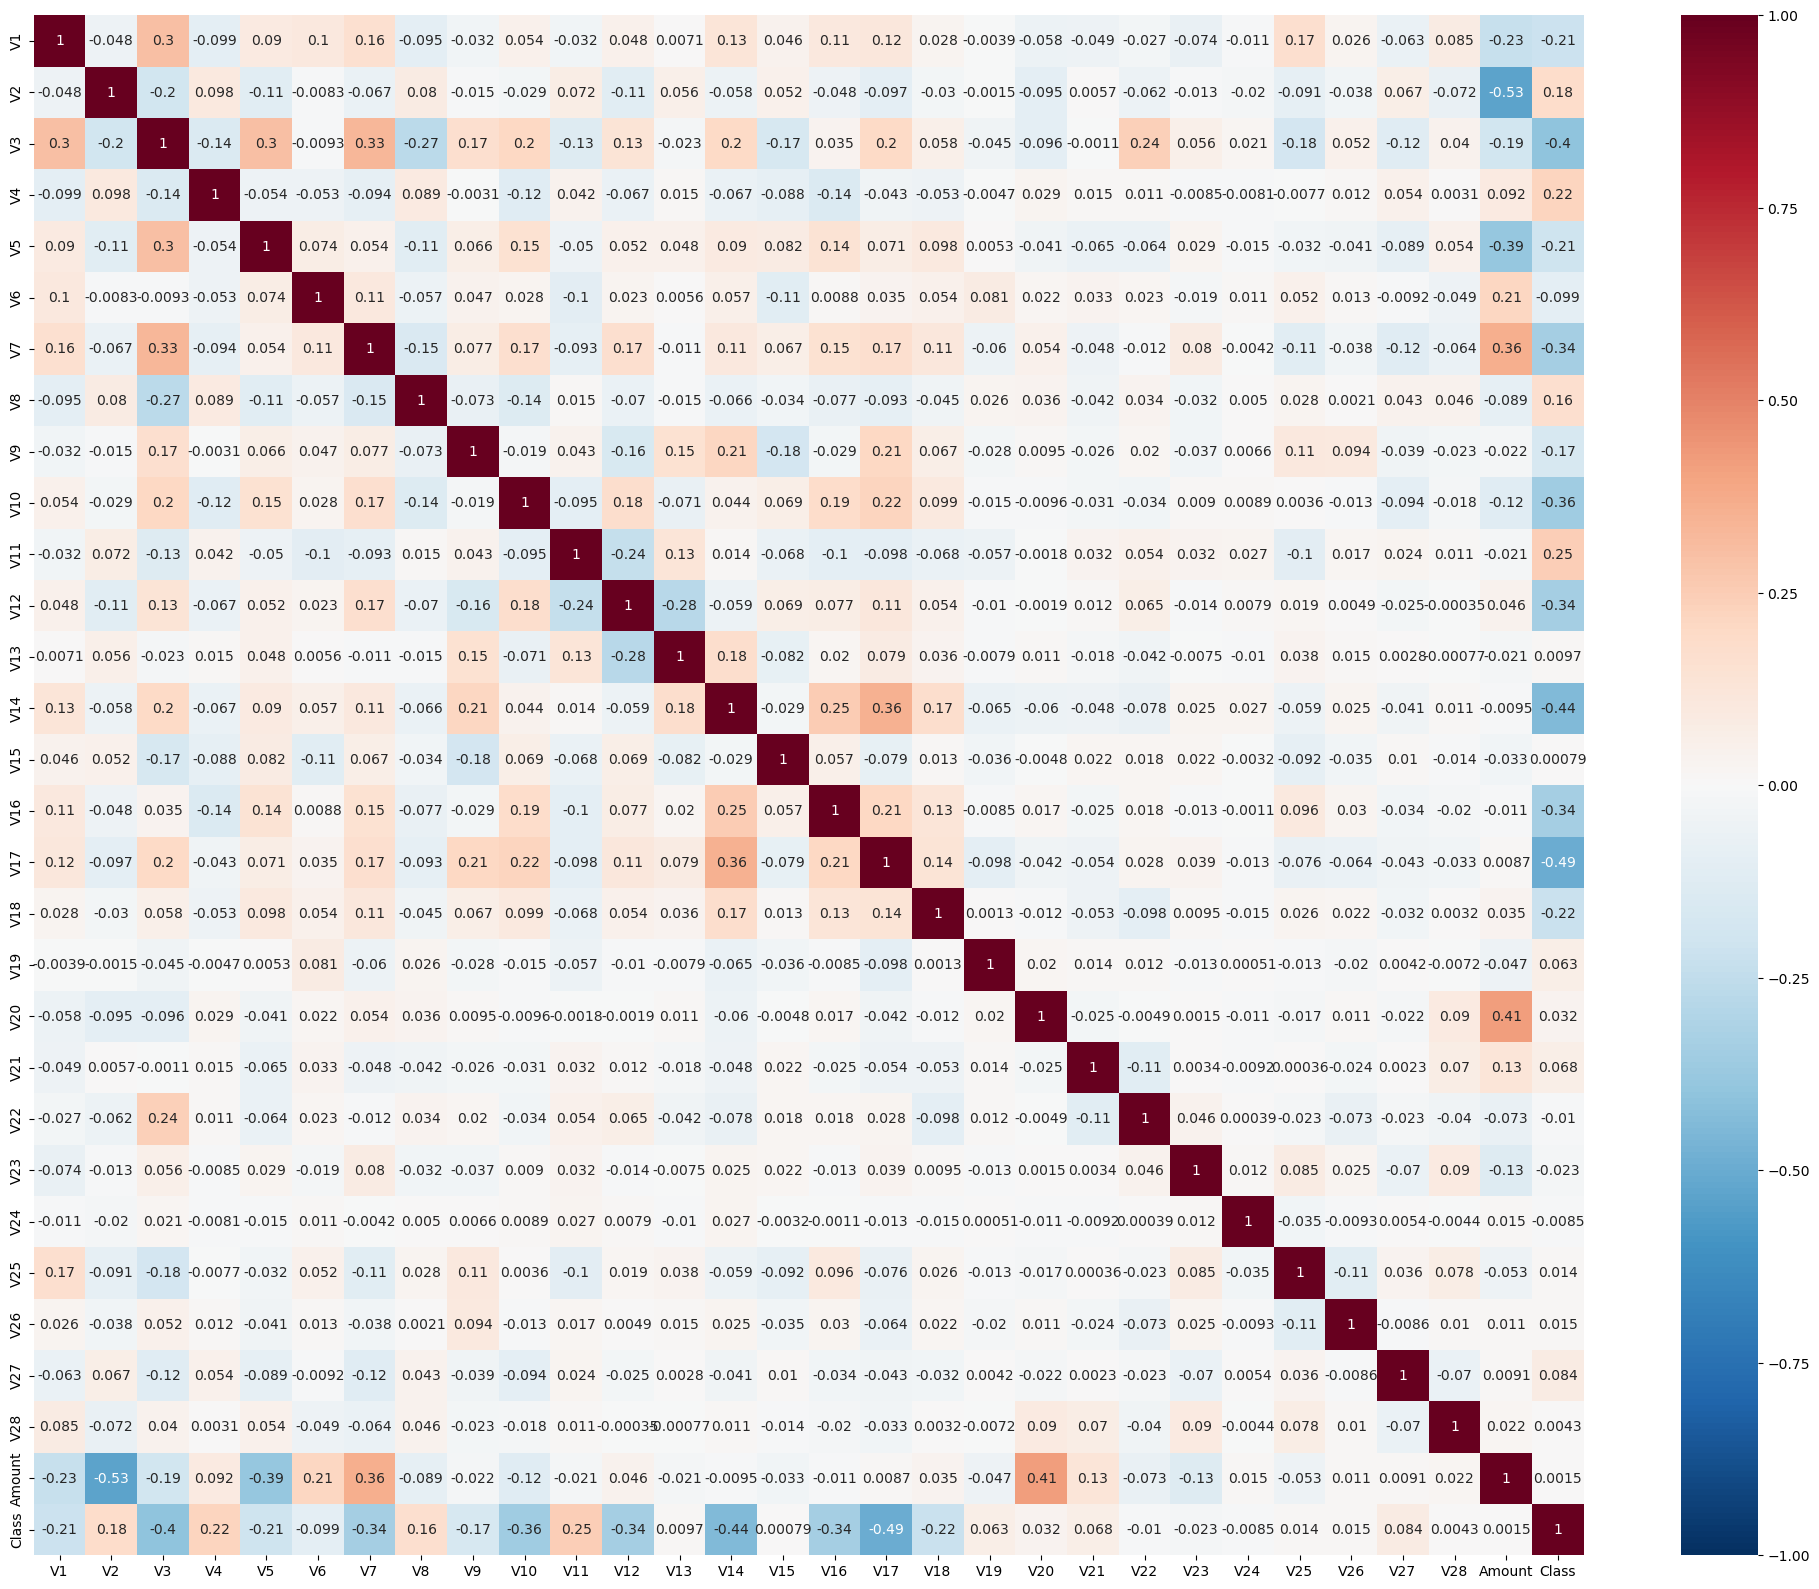

In [12]:
plt.figure(figsize=(25, 20))
heat_map = sns.heatmap(data_cleaned.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

Pour analyser les caractéristiques les plus pertinentes pour la détection de fraude, nous utilisons deux algorithmes de la méthode Ensemble pour extraire les caractéristiques.


Nous allons d'abors separer l'entité et la cible.

In [13]:
x = data_cleaned.drop(columns='Class')
y = data_cleaned['Class']

Ensuite faire la standardisation des données 

In [14]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [15]:
x['Amount'] = scaler.fit_transform(data_cleaned[['Amount']])
x['Time'] = min_max.fit_transform(data_cleaned[['Time']])

Nous avonc 28 features dans nos donnée, nous allons donc trier les features les plus importante pour la detection de fraude a partir de l'algorithme de Rnadom forest et celui l'arbre de decision

In [16]:
random_forest_features = RandomForestClassifier(n_estimators=100, max_depth=15)
tree_features = DecisionTreeClassifier()

In [17]:
#Entrainer les modeles sur nos données criteres
random_forest_features.fit(x, y)
tree_features.fit(x, y)

DecisionTreeClassifier()

Trier les features les plus importantes

In [18]:
random_forest_features_imp = pd.Series(random_forest_features.feature_importances_,
                                       index = data_cleaned.columns[:-1])
random_forest_features_imp_order = random_forest_features_imp.sort_values()

tree_features_imp = pd.Series(tree_features.feature_importances_,
                              index = data_cleaned.columns[:-1])
tree_features_imp_order = tree_features_imp.sort_values()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


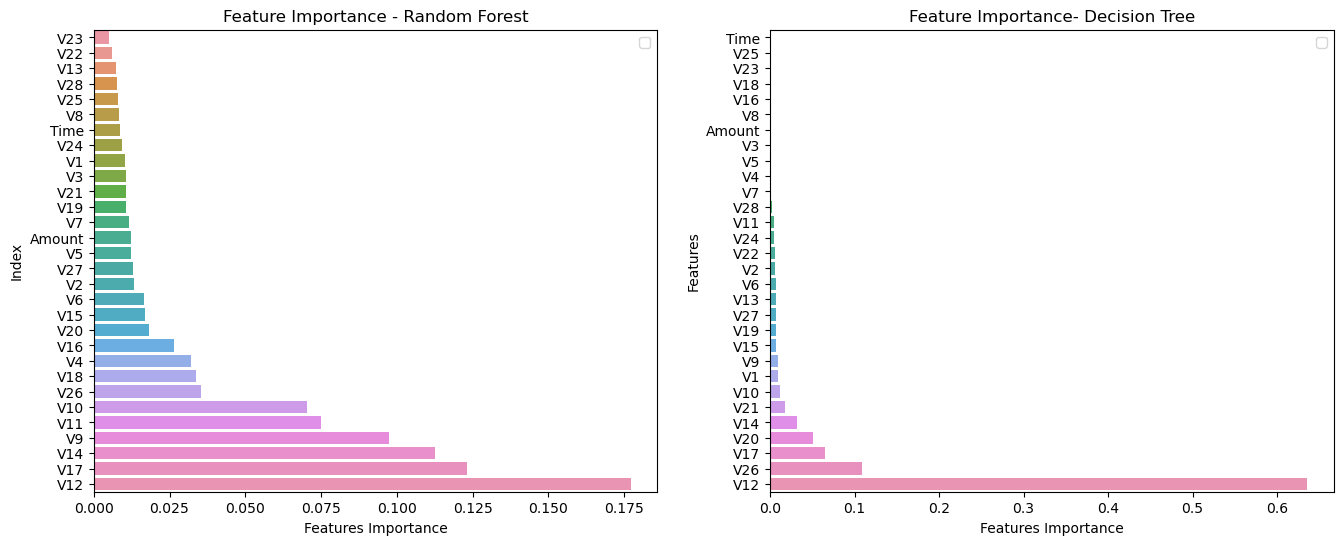

In [19]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
sns.barplot(x=random_forest_features_imp_order, y = random_forest_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance - Random Forest")
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x=tree_features_imp_order, y = tree_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Features")
plt.title("Feature Importance- Decision Tree")
plt.legend()
plt.show()

Entre les deux algorithmes, nous avons eu peu de divergence. Cependant, j'ai considéré le résultat des caractéristiques les plus importantes de l'algorithme Random Forest, car il considérait un plus grand nombre de variables pour la prise de décision.


Nous allons supprimer les fonctionnalité moins importante

In [20]:
list_features = []
for k, v in random_forest_features_imp_order[:5].items():
    list_features.append(k)
    
print(f'Fonctionnalié moins importante: {list_features}')

Fonctionnalié moins importante: ['V23', 'V22', 'V13', 'V28', 'V25']


In [21]:
df = data_cleaned.drop(columns=list_features)

 Nous allons appliquer la structuration et la normalisation aux données à grande échelle

In [22]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [23]:
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = min_max.fit_transform(df[['Time']])

Appliquer la technique de suréchantillonnage SMOTE pour rééquilibrer l'ensemble de données.
Comme l'ensemble de données est très déséquilibré, le modèle devient biaisé vers la classe (non frauduleuse) qui a le plus de données ;
De cette façon, j'applique la technique de suréchantillonnage sur les données d'apprentissage, sans manipuler les données de test :
Cela rend la formation du modèle avec deux classes équilibrées, ce qui rend le modèle non biaisé ;
Les données de test suivent les données originales déséquilibrées.

Dans un premier temps, nous allons separer les données d'entrainement et de test

In [24]:
X = df.drop(columns='Class')
y = df['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Nous appliquons la technique de rééquilibrage des jeux de données uniquement aux données d'apprentissage ;
Nous n'avons pas appliqué la technique pour tester les données car elles diffèrent de la réalité ;
L'application de la technique aux données d'apprentissage est idéale pour ne pas avoir de modèle biaisé.


Comparaison de la distribution des classes de données d'entraînement

C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


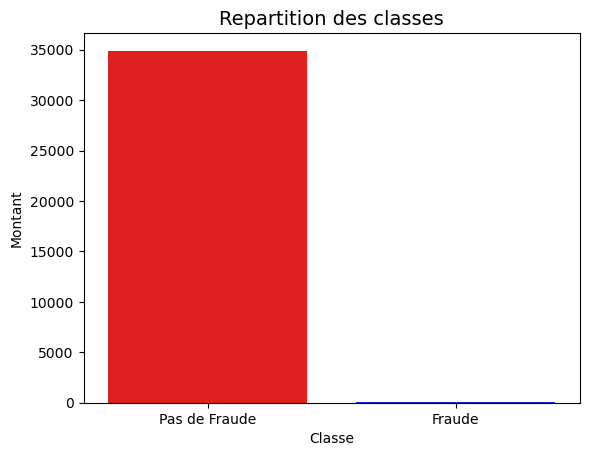

In [26]:
#Données d'entrainement desequilibré
labels = ['Pas de Fraude', 'Fraude']
sns.countplot(y_train, palette = ['red','blue'])
plt.title('Repartition des classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Montant");

C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


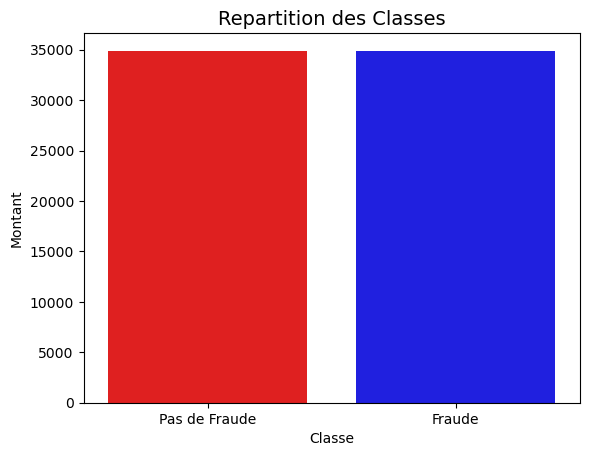

In [27]:
#données d'entrainement(train) equilibrés
labels = ['Pas de Fraude', 'Fraude']
sns.countplot(y_train_smote, palette = ['red','blue'])
plt.title('Repartition des Classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Montant");

Apres avoir reequilibré nos données d'entrainement, nous allons faire une serie de test de comparaisons sur different modeles de classification

In [28]:
# Définir les valeurs pour le nombre de plis
num_folds = 3
seed = 7

models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("XGB Classifier", XGBClassifier()))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
models.append(('SVM', SVC()))

models

[('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier()),
 ('XGB Classifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...)),
 ('Gradient Boosting Classifier'

In [30]:

# Évaluer chaque modèle en boucle
resultats = []
noms = []
print(f"{'Nom de Model':{30}}| {'Précision moyenne':{15}} | {'Écart-type':{5}}")
for nom, model in models:
    kfold = KFold(n_splits = num_folds, shuffle = True)
    cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv = kfold, scoring = 'f1')
    resultats.append(cv_results)
    noms.append(nom)
    print(f"{nom:{30}}: {(np.around(cv_results.mean(), decimals=4))*100:{10}}%\
    {(np.around(cv_results.std(), decimals=4))*100:{10}}%")

Nom de Model                  | Précision moyenne | Écart-type


C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression           : 98.50999999999999%          0.02%
Naive Bayes                   :      95.55%          0.08%
Decision Tree                 : 99.85000000000001%          0.02%
Random Forest                 :      99.98%          0.01%
XGB Classifier                :      99.97%          0.02%
Gradient Boosting Classifier  :      99.87%          0.03%
SVM                           : 98.92999999999999%          0.02%


J'ai sélectionné les modèles suivants : 
    - Decision Tree
    - Random Forest;
    - XGB Classifier;
    - Logistic Regression 
    pour la suite de l'analyse

Nous allons appliquer le GridSearch pour le réglage et la validation avec des données de test.
La métrique choisie pour optimiser les hyperparamètres est le F1-Score, considérant que le jeu de données est déséquilibré.

In [32]:
# parametre de Random Forest
grid_rf = {
    "n_estimators" : [100, 200],
    "max_depth": [15, 25],
    "max_features": ['auto']
    }

# Création de modèle
rf = RandomForestClassifier()
#Application de GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'f1', n_jobs = -1)
#Entrainement du model
clf_rf.fit(X_train_smote, y_train_smote)
# Faire les predictions
y_pred_rf = clf_rf.predict(X_test)
# Evaluation du model
print(classification_report(y_test, y_pred_rf))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_rf))
print("------------------------------------------------------")
print("RandomForestClassifier f1-score: {}".format(f1_score(y_test, y_pred_rf)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       0.91      0.94      0.92        52

    accuracy                           1.00     15000
   macro avg       0.95      0.97      0.96     15000
weighted avg       1.00      1.00      1.00     15000

------------------------------------------------------
[[14943     5]
 [    3    49]]
------------------------------------------------------
RandomForestClassifier f1-score: 0.9245283018867925


In [33]:
# parametre de XGBClassifier
grid_xgbc = { 'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.15],
              'max_depth': [15, 25]}
#  Création du modèle
xgb = XGBClassifier()
# Application de GridSearchCV
clf_xgb = GridSearchCV(xgb, param_grid= grid_xgbc, cv=3,  scoring = 'f1', n_jobs = -1)
# Entrainnement du modele
clf_xgb.fit(X_train_smote, y_train_smote)
# Faire la prediction
y_pred_xgb = clf_xgb.predict(X_test)
#Evaluatio du modele 
print(classification_report(y_test, y_pred_xgb))
print("------------------------------------------------------")
#La matrice de confusion montre le nombre de vrais positifs, de vrais négatifs, 
#de faux positifs et de faux négatifs
print(confusion_matrix(y_test, y_pred_xgb))
print("------------------------------------------------------")
print("XGBClassifier f1-score: {}".format(f1_score(y_test, y_pred_xgb)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       0.88      0.94      0.91        52

    accuracy                           1.00     15000
   macro avg       0.94      0.97      0.95     15000
weighted avg       1.00      1.00      1.00     15000

------------------------------------------------------
[[14941     7]
 [    3    49]]
------------------------------------------------------
XGBClassifier f1-score: 0.9074074074074073


In [34]:
# parametre de LogisticRegression
grid_rl = {"solver": ["liblinear", "lbfgs"],
           "C":[10, 25],
           "penalty" : ["l2"]}
# Creation du modele
logistic = LogisticRegression()
# Application de GridSearchCV
clf_lr = GridSearchCV(logistic, param_grid = grid_rl, cv=3, scoring = 'f1', verbose=0)
# Entrainement du modele
clf_lr.fit(X_train_smote, y_train_smote)
# Faire la prediction
y_pred_logistic = clf_lr.predict(X_test)
#Evaluation du modele
print(classification_report(y_test, y_pred_logistic))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_logistic))
print("------------------------------------------------------")
print("LogisticRegression f1-score: {}".format(f1_score(y_test, y_pred_logistic)))

C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Degbey Kayeon\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14948
           1       0.22      0.96      0.35        52

    accuracy                           0.99     15000
   macro avg       0.61      0.97      0.67     15000
weighted avg       1.00      0.99      0.99     15000

------------------------------------------------------
[[14767   181]
 [    2    50]]
------------------------------------------------------
LogisticRegression f1-score: 0.3533568904593639


In [35]:
# Définissez les hyperparamètres à optimiser et leurs valeurs possibles
grid_dt = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Créez une instance de DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Appliquez GridSearchCV
clf_dt = GridSearchCV(dt, param_grid=grid_dt, cv=3, scoring='f1', n_jobs=-1)

# Entraînez le modèle
clf_dt.fit(X_train_smote, y_train_smote)

# Faites les prédictions
y_pred_dt = clf_dt.predict(X_test)

# Évaluez le modèle
print(classification_report(y_test, y_pred_dt))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_dt))
print("------------------------------------------------------")
print("DecisionTreeClassifier f1-score: {}".format(f1_score(y_test, y_pred_dt)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14948
           1       0.66      0.88      0.75        52

    accuracy                           1.00     15000
   macro avg       0.83      0.94      0.88     15000
weighted avg       1.00      1.00      1.00     15000

------------------------------------------------------
[[14924    24]
 [    6    46]]
------------------------------------------------------
DecisionTreeClassifier f1-score: 0.7540983606557377


Nous allons utiliser l'algorithme de Random Forest pour notre application de detection de fraude car ayant des données deséquilibré, elle a obtenu les meilleures performances en analysant la metrique F1-Score.